# Stable Diffusion Initialisation

In [1]:
import os
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math
import time
import tensorflow as tf
from tensorflow.keras.layers import GRU, LSTM, Bidirectional, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras import Sequential
#from keras.utils.vis_utils import plot_model
from pickle import load
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import statsmodels.api as sm
from math import sqrt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from pickle import dump
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
import os
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math
import time
import tensorflow as tf
from tensorflow.keras.layers import GRU, LSTM, Bidirectional, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras import Sequential
from pickle import load
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import statsmodels.api as sm
from math import sqrt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from pickle import dump
#import snscrape.modules.twitter as sntwitter
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
#import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import inflect
import random
from keras.layers import Input, Dense, Reshape
from keras.models import Model
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, Flatten, Input, Concatenate
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings("ignore")


import pkg_resources
#from symspellpy import SymSpell, Verbosity
import itertools
# Importing essential libraries

#from xgboost import XGBClassifier
from transformers import BertTokenizer, BertModel
from transformers import get_linear_schedule_with_warmup

from sklearn import preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import requests
import unicodedata
import tqdm

import spacy
from spacy.cli import download
import sys
#import gensim
#from gensim.models.phrases import Phrases, Phraser
import multiprocessing
#from gensim.models import Word2Vec, KeyedVectors
import transformers
## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
!pip install transformers diffusers lpips accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 31.8 MB/s eta 0:00:00


In [3]:
from huggingface_hub import notebook_login
notebook_login()

In [4]:
import torch
from transformers import CLIPTextModel, CLIPTokenizer
from diffusers import AutoencoderKL, UNet2DConditionModel, LMSDiscreteScheduler
from tqdm.auto import tqdm
from torch import autocast
from PIL import Image
from matplotlib import pyplot as plt
import numpy
from torchvision import transforms as tfms

# For video display:
from IPython.display import HTML
from base64 import b64encode

# Set device
torch_device = "cuda" if torch.cuda.is_available() else "cpu"

In [5]:
# Load the autoencoder model which will be used to decode the latents into image space.
vae = AutoencoderKL.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="vae", use_auth_token=True)

# Load the tokenizer and text encoder to tokenize and encode the text.
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-large-patch14")
text_encoder = CLIPTextModel.from_pretrained("openai/clip-vit-large-patch14")

# The UNet model for generating the latents.
unet = UNet2DConditionModel.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="unet", use_auth_token=True)

# The noise scheduler
scheduler = LMSDiscreteScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", num_train_timesteps=1000)

# To the GPU we go!
vae = vae.to(torch_device)
text_encoder = text_encoder.to(torch_device)
unet = unet.to(torch_device)

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

In [6]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("sts Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
  return mae / mae_naive_no_season

def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

# News to Image Generation by Stable Diffusion

*  The diffusion model begins with a random noise image and uses the encoded text in a denoising process to generate a high-quality image.

In [7]:
import pandas as pd
final_data = pd.read_csv(r"data.csv")

In [8]:
final_data = final_data.tail(100)
final_data.head(5)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top24,Top25,Open,High,Low,Close,Volume,Adj Close,cleaned_data,spellcheck
1889,2016-02-10,0,British ISIS fighter who called himself 'Super...,Animals reduced to cannibalism in Egyptian zoo...,"Grow a thicker skin, Germany tells Poland: The...",At least 50 killed in a prison riot in Monterr...,North Korea accuses South Korea of 'dangerous ...,Catholic bishops not obliged to report clerica...,'British child' blows up Isis prisoners in new...,Saudi Arabia may deploy troops in Syria to cou...,...,North Korea Expels South Koreans From Joint Pa...,UK Junior doctors' contract set to be imposed,16035.610352,16201.889648,15899.910156,15914.740234,122290000,15914.740234,british isi fighter superman return uk syria c...,british isi fighter superman return uk syria c...
1890,2016-02-11,0,Gravitational waves from black holes detected,Teen girl sent by Boko Haram rips off suicide ...,"South Korea cuts off power, water into Kaesong...",Families of Americans killed by Mexican cartel...,"Netanyahu's wife abused household staff, Israe...",The European Union has given Greece three mont...,Agreement reached at international talks on na...,Afghan Taliban flogs woman in public for going...,...,Bahrain's king hands 'sword of victory' to Put...,Report: Iranian Official Says GOPers Tried To ...,15897.820312,15897.820312,15503.009766,15660.179688,172070000,15660.179688,gravit wave black hole detect teen girl send b...,gravity wave black hole detect teen girl send ...
1891,2016-02-12,1,"150,000 penguins killed after giant iceberg re...",U.S. to restore commercial air travel to Cuba,India 'disappointed' as US decides to sell eig...,Medieval trading ship raised to surface 'almos...,Four billion people face severe water scarcity...,Pope meets Russian Orthodox head after 962-yea...,"More than 5,000 pregnant women in Colombia hav...",Turkey spent 20 times more than international ...,...,Newly invented Aldehyde-Stabilized Cryopreserv...,Saudi Foreign Minister says removal of Assad i...,15691.620117,15974.040039,15691.620117,15973.839844,132550000,15973.839844,penguin kill giant iceberg render coloni landl...,penguin kill giant iceberg render colony landl...
1892,2016-02-16,1,Faced with a cash shortage in its so-called ca...,According to NASA data this January was the wa...,US stealth jets flying over S. Korea amid N. K...,A piece of Mozart music considered lost for mo...,Iranian Heavy Metal Band 'Confess' Reportedly ...,Paedophile who led child sex grooming ring usi...,"800 Bataclan survivors get to ""finish the conc...",Eagles of Death Metal perform again in Paris t...,...,Russian vodka exports slump 40% because of san...,The overconsumption of meat will inevitably pu...,16012.389648,16196.410156,16012.389648,16196.410156,142030000,16196.410156,face cash shortag caliph islam state group sla...,face cash shortage caliph islam state group sl...
1893,2016-02-17,1,Colombian prison drain pipes yield over 100 di...,Scientists warn of coming global disaster beca...,Blast hits Ankara military building,ISIS beheads 15-year-old Iraqi boy for listeni...,N. Korea prepares for terror attacks on S. Kor...,"Huge explosion hits Turkish Centre, Stockholm,...",Fast-growing tumbleweed called hairy panic blo...,New LSE report recommends 'War on Drugs' is re...,...,Pakistans parliament becomes first in world to...,Cash for Life: Guaranteed Annual Income Gainin...,16217.980469,16486.119141,16217.980469,16453.830078,124080000,16453.830078,colombia prison drain pipe yield dismemb corps...,colombia prison drain pipe yield disamb corps ...


In [9]:
sent_df = final_data.copy()
sent_df["sentiment_score"] = ''
sent_df["Negative"] = ''
sent_df["Neutral"] = ''
sent_df["Positive"] = ''
sent_df.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Low,Close,Volume,Adj Close,cleaned_data,spellcheck,sentiment_score,Negative,Neutral,Positive
1889,2016-02-10,0,British ISIS fighter who called himself 'Super...,Animals reduced to cannibalism in Egyptian zoo...,"Grow a thicker skin, Germany tells Poland: The...",At least 50 killed in a prison riot in Monterr...,North Korea accuses South Korea of 'dangerous ...,Catholic bishops not obliged to report clerica...,'British child' blows up Isis prisoners in new...,Saudi Arabia may deploy troops in Syria to cou...,...,15899.910156,15914.740234,122290000,15914.740234,british isi fighter superman return uk syria c...,british isi fighter superman return uk syria c...,,,,
1890,2016-02-11,0,Gravitational waves from black holes detected,Teen girl sent by Boko Haram rips off suicide ...,"South Korea cuts off power, water into Kaesong...",Families of Americans killed by Mexican cartel...,"Netanyahu's wife abused household staff, Israe...",The European Union has given Greece three mont...,Agreement reached at international talks on na...,Afghan Taliban flogs woman in public for going...,...,15503.009766,15660.179688,172070000,15660.179688,gravit wave black hole detect teen girl send b...,gravity wave black hole detect teen girl send ...,,,,
1891,2016-02-12,1,"150,000 penguins killed after giant iceberg re...",U.S. to restore commercial air travel to Cuba,India 'disappointed' as US decides to sell eig...,Medieval trading ship raised to surface 'almos...,Four billion people face severe water scarcity...,Pope meets Russian Orthodox head after 962-yea...,"More than 5,000 pregnant women in Colombia hav...",Turkey spent 20 times more than international ...,...,15691.620117,15973.839844,132550000,15973.839844,penguin kill giant iceberg render coloni landl...,penguin kill giant iceberg render colony landl...,,,,


In [10]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [11]:
%%time
sentiment_analyzer = SentimentIntensityAnalyzer()
for indx, row in sent_df.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', sent_df.loc[indx, 'spellcheck'])
        sentence_sentiment = sentiment_analyzer.polarity_scores(sentence_i)
        sent_df.at[indx, 'sentiment_score'] = sentence_sentiment['compound']
        sent_df.at[indx, 'Negative'] = sentence_sentiment['neg']
        sent_df.at[indx, 'Neutral'] = sentence_sentiment['neu']
        sent_df.at[indx, 'Positive'] = sentence_sentiment['pos']
    except TypeError:
        print (sent_df.loc[indx, 'spellcheck'])
        print (indx)
        break

CPU times: user 272 ms, sys: 0 ns, total: 272 ms
Wall time: 273 ms


In [12]:
sent_df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Low,Close,Volume,Adj Close,cleaned_data,spellcheck,sentiment_score,Negative,Neutral,Positive
1889,2016-02-10,0,British ISIS fighter who called himself 'Super...,Animals reduced to cannibalism in Egyptian zoo...,"Grow a thicker skin, Germany tells Poland: The...",At least 50 killed in a prison riot in Monterr...,North Korea accuses South Korea of 'dangerous ...,Catholic bishops not obliged to report clerica...,'British child' blows up Isis prisoners in new...,Saudi Arabia may deploy troops in Syria to cou...,...,15899.910156,15914.740234,122290000,15914.740234,british isi fighter superman return uk syria c...,british isi fighter superman return uk syria c...,-0.9906,0.272,0.631,0.097
1890,2016-02-11,0,Gravitational waves from black holes detected,Teen girl sent by Boko Haram rips off suicide ...,"South Korea cuts off power, water into Kaesong...",Families of Americans killed by Mexican cartel...,"Netanyahu's wife abused household staff, Israe...",The European Union has given Greece three mont...,Agreement reached at international talks on na...,Afghan Taliban flogs woman in public for going...,...,15503.009766,15660.179688,172070000,15660.179688,gravit wave black hole detect teen girl send b...,gravity wave black hole detect teen girl send ...,-0.9758,0.162,0.778,0.06
1891,2016-02-12,1,"150,000 penguins killed after giant iceberg re...",U.S. to restore commercial air travel to Cuba,India 'disappointed' as US decides to sell eig...,Medieval trading ship raised to surface 'almos...,Four billion people face severe water scarcity...,Pope meets Russian Orthodox head after 962-yea...,"More than 5,000 pregnant women in Colombia hav...",Turkey spent 20 times more than international ...,...,15691.620117,15973.839844,132550000,15973.839844,penguin kill giant iceberg render coloni landl...,penguin kill giant iceberg render colony landl...,-0.9698,0.175,0.739,0.085
1892,2016-02-16,1,Faced with a cash shortage in its so-called ca...,According to NASA data this January was the wa...,US stealth jets flying over S. Korea amid N. K...,A piece of Mozart music considered lost for mo...,Iranian Heavy Metal Band 'Confess' Reportedly ...,Paedophile who led child sex grooming ring usi...,"800 Bataclan survivors get to ""finish the conc...",Eagles of Death Metal perform again in Paris t...,...,16012.389648,16196.410156,142030000,16196.410156,face cash shortag caliph islam state group sla...,face cash shortage caliph islam state group sl...,-0.7003,0.171,0.687,0.142
1893,2016-02-17,1,Colombian prison drain pipes yield over 100 di...,Scientists warn of coming global disaster beca...,Blast hits Ankara military building,ISIS beheads 15-year-old Iraqi boy for listeni...,N. Korea prepares for terror attacks on S. Kor...,"Huge explosion hits Turkish Centre, Stockholm,...",Fast-growing tumbleweed called hairy panic blo...,New LSE report recommends 'War on Drugs' is re...,...,16217.980469,16453.830078,124080000,16453.830078,colombia prison drain pipe yield dismemb corps...,colombia prison drain pipe yield disamb corps ...,-0.988,0.206,0.733,0.061


In [13]:
data1_new = sent_df.set_index('Date')

In [14]:
data1_new.head(2)


,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Low,Close,Volume,Adj Close,cleaned_data,spellcheck,sentiment_score,Negative,Neutral,Positive
Date,,,,,,,,,,,,,,,,,,,,,
2016-02-10,0,British ISIS fighter who called himself 'Super...,Animals reduced to cannibalism in Egyptian zoo...,"Grow a thicker skin, Germany tells Poland: The...",At least 50 killed in a prison riot in Monterr...,North Korea accuses South Korea of 'dangerous ...,Catholic bishops not obliged to report clerica...,'British child' blows up Isis prisoners in new...,Saudi Arabia may deploy troops in Syria to cou...,Female suicide bombers kill over 60 people in ...,...,15899.910156,15914.740234,122290000,15914.740234,british isi fighter superman return uk syria c...,british isi fighter superman return uk syria c...,-0.9906,0.272,0.631,0.097
2016-02-11,0,Gravitational waves from black holes detected,Teen girl sent by Boko Haram rips off suicide ...,"South Korea cuts off power, water into Kaesong...",Families of Americans killed by Mexican cartel...,"Netanyahu's wife abused household staff, Israe...",The European Union has given Greece three mont...,Agreement reached at international talks on na...,Afghan Taliban flogs woman in public for going...,China now the world leader in wind power produ...,...,15503.009766,15660.179688,172070000,15660.179688,gravit wave black hole detect teen girl send b...,gravity wave black hole detect teen girl send ...,-0.9758,0.162,0.778,0.06


In [15]:
final_spell = data1_new[["spellcheck"]]

In [16]:
len(final_spell)

100

In [17]:
final_df = data1_new[['Close']]

In [18]:
final_df

,Close
Date,
2016-02-10,15914.740234
2016-02-11,15660.179688
2016-02-12,15973.839844
2016-02-16,16196.410156
2016-02-17,16453.830078
...,...
2016-06-27,17140.240234
2016-06-28,17409.720703
2016-06-29,17694.679688


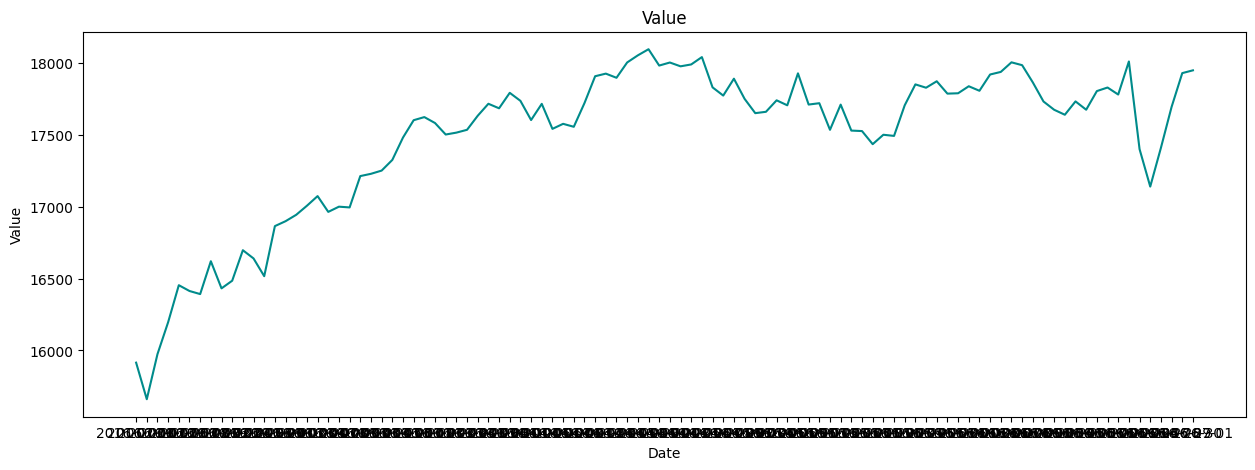

In [19]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(final_df.index, final_df['Close'], color='#008B8B')
ax.set(xlabel="Date", ylabel="Value", title="Value")
#ax.xaxis.set_major_formatter(DateFormatter("%Y "))
plt.show()

In [20]:
def get_tech_ind(data):
    data['MA7'] = data.iloc[:,0].rolling(window=7).mean() #Close column
    data['MA20'] = data.iloc[:,0].rolling(window=20).mean() #Close Column

    data['MACD'] = data.iloc[:,0].ewm(span=26).mean() - data.iloc[:,1].ewm(span=12,adjust=False).mean()
    #This is the difference of Closing price and Opening Price

    # Create Bollinger Bands
    data['20SD'] = data.iloc[:, 0].rolling(20).std()
    data['upper_band'] = data['MA20'] + (data['20SD'] * 2)
    data['lower_band'] = data['MA20'] - (data['20SD'] * 2)

    # Create Exponential moving average
    data['EMA'] = data.iloc[:,0].ewm(com=0.5).mean()

    return data

In [21]:
tech_df = get_tech_ind(final_df)
dataset = tech_df.iloc[20:,:]
dataset.head()

,Close,MA7,MA20,MACD,20SD,upper_band,lower_band,EMA
Date,,,,,,,,
2016-03-10,16995.130859,16983.361328,16611.473926,11.615103,377.820724,17367.115374,15855.832477,16995.701317
2016-03-11,17213.310547,17028.217076,16689.130469,8.009901,328.381783,17345.894035,16032.366903,17140.774137
2016-03-14,17229.130859,17068.964286,16751.895019,2.201848,303.491028,17358.877076,16144.912963,17199.678618
2016-03-15,17251.529297,17103.929966,16804.650976,-4.064834,293.386438,17391.423852,16217.878100,17234.245737
2016-03-16,17325.759766,17139.902902,16848.247461,-6.421427,303.132977,17454.513415,16241.981506,17295.255090


In [22]:
final = pd.merge(dataset, final_spell, how='outer', on='Date')

In [23]:
final.head(5)

,Close,MA7,MA20,MACD,20SD,upper_band,lower_band,EMA,spellcheck
Date,,,,,,,,,
2016-03-10,16995.130859,16983.361328,16611.473926,11.615103,377.820724,17367.115374,15855.832477,16995.701317,robot send fukushima die soon close reactor ra...
2016-03-11,17213.310547,17028.217076,16689.130469,8.009901,328.381783,17345.894035,16032.366903,17140.774137,north korean submarine miss alpha beat lee se ...
2016-03-14,17229.130859,17068.964286,16751.895019,2.201848,303.491028,17358.877076,16144.912963,17199.678618,italic chang law supermarket unsold food need ...
2016-03-15,17251.529297,17103.929966,16804.650976,-4.064834,293.386438,17391.423852,16217.878100,17234.245737,fifa admit world cup host bribe ask return mon...
2016-03-16,17325.759766,17139.902902,16848.247461,-6.421427,303.132977,17454.513415,16241.981506,17295.255090,state dept declare isi commit genocide iraq sy...


In [24]:
final = final.dropna()

In [25]:
len(final)

80

In [26]:
final_spell = final[["spellcheck"]]
len(final_spell)

80

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

def tech_ind(dataset):
    fig, ax = plt.subplots(figsize=(15, 5), dpi=200)

    # Convert 'Time' column to datetime format
    #dataset['Time'] = pd.to_datetime(dataset['Time'], unit='s')  # Assuming 'Time' is in seconds

    # Set the 'Time' column as the index
    #dataset.set_index('Time', inplace=True)

    ax.plot(dataset.index, dataset['MA7'], label='Moving Average (7 days)', color='g', linestyle='--')
    ax.plot(dataset.index, dataset['Close'], label='Closing Price', color='#6A5ACD')
    ax.plot(dataset.index, dataset['MA20'], label='Moving Average (20 days)', color='r', linestyle='-.')
    ax.plot(dataset.index, dataset['upper_band'], label='Upper Bollinger Band', color='c')
    ax.plot(dataset.index, dataset['lower_band'], label='Lower Bollinger Band', color='c')
    ax.fill_between(dataset.index, dataset['lower_band'], dataset['upper_band'], alpha=0.35, color='#B0E0E6')

    ax.xaxis.set_major_formatter(DateFormatter("%d-%m-%Y"))  # Adjust the date format as needed

    plt.title('Technical indicators')
    plt.ylabel('Close')
    plt.xlabel("Date")
    plt.legend()

    plt.show()

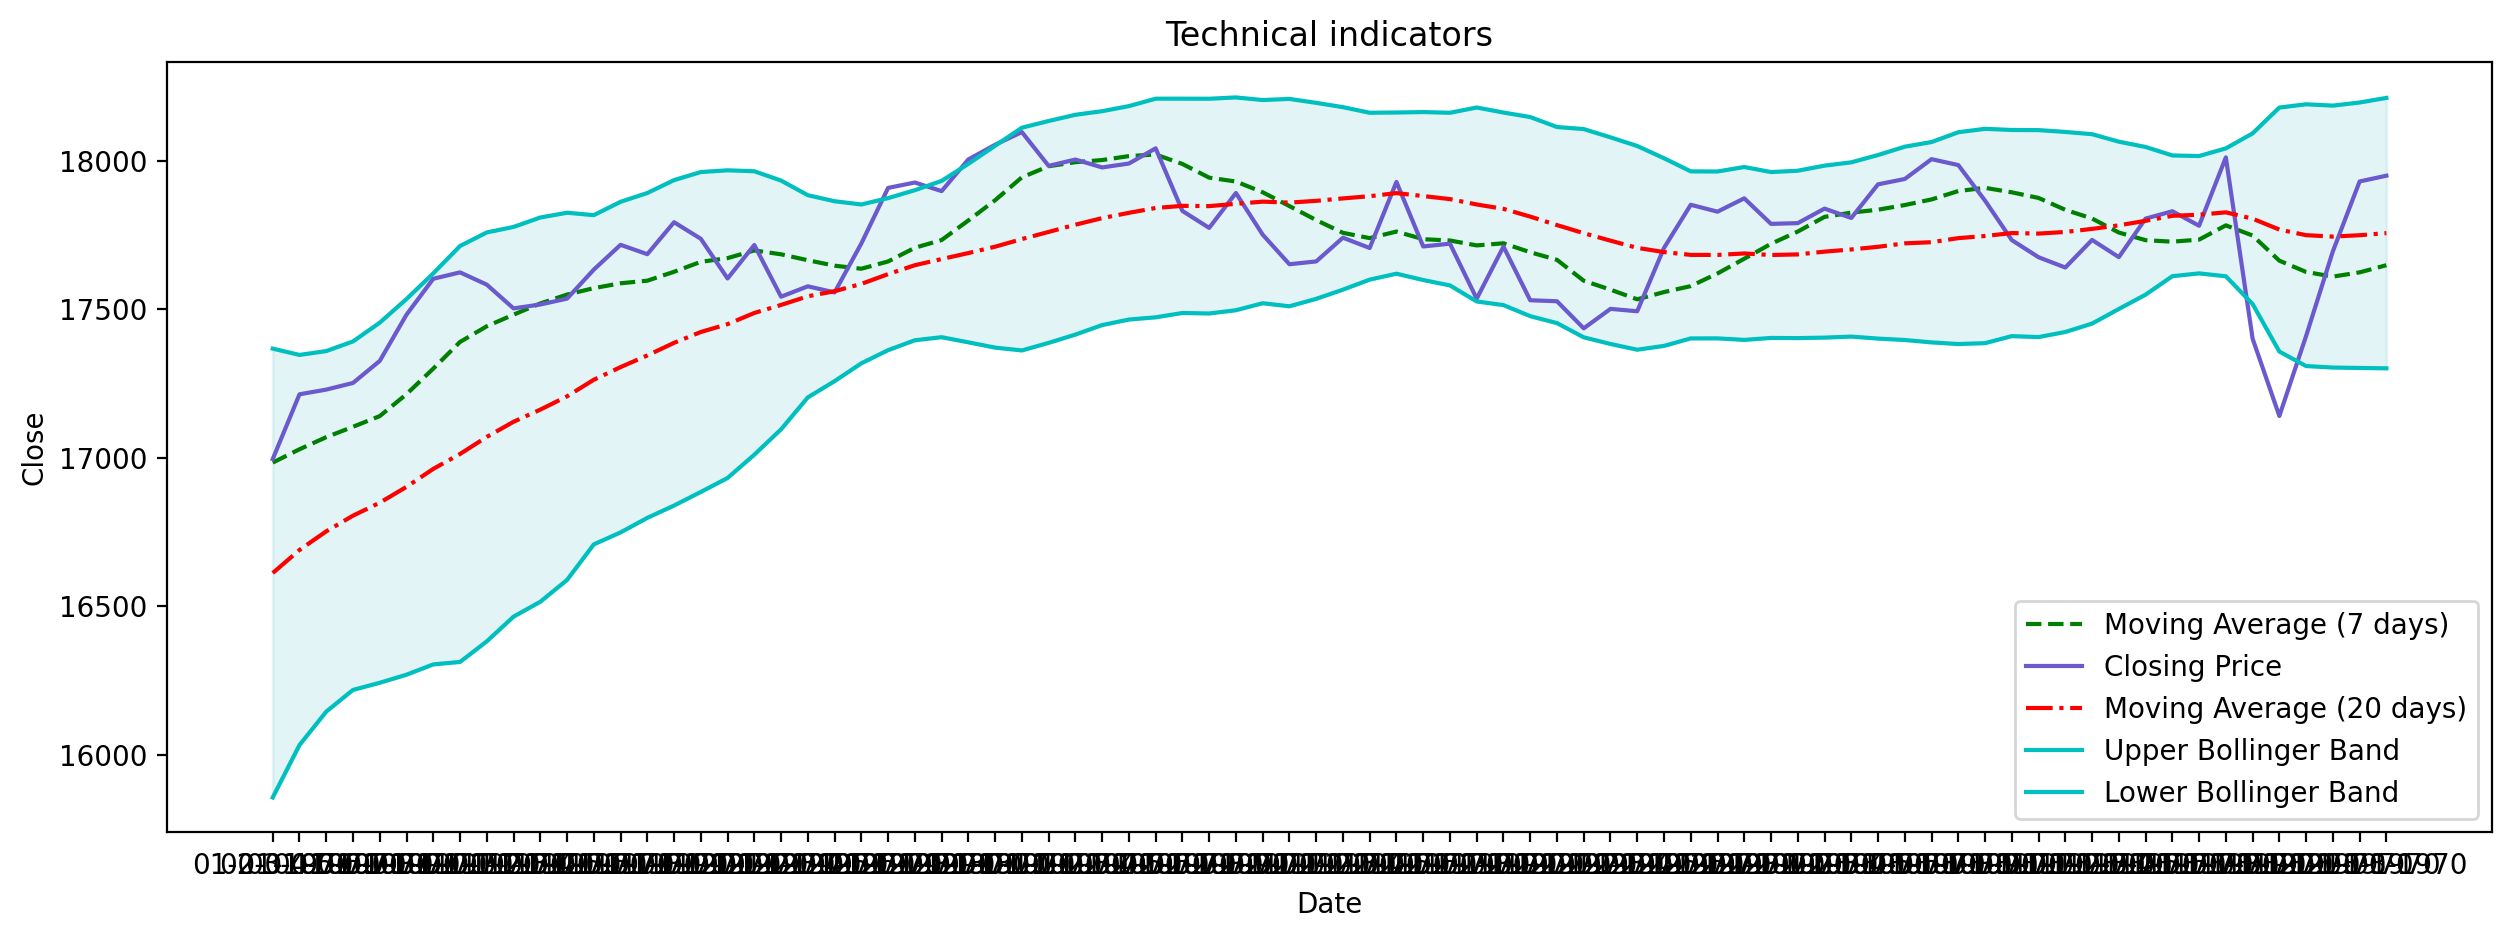

In [28]:
tech_ind(final)

In [29]:
training_news = final_spell

In [30]:
len(final_spell)

80

In [31]:
split_size = int(len(final_spell) * 0.8)
train_news = training_news[:split_size]
train_news.head(5)

,spellcheck
Date,
2016-03-10,robot send fukushima die soon close reactor ra...
2016-03-11,north korean submarine miss alpha beat lee se ...
2016-03-14,italic chang law supermarket unsold food need ...
2016-03-15,fifa admit world cup host bribe ask return mon...
2016-03-16,state dept declare isi commit genocide iraq sy...


In [32]:
len(train_news)

64

In [33]:
split_size

64

In [34]:
test_news = training_news[split_size:]
test_news.head(5)

,spellcheck
Date,
2016-06-10,chief admit remove saudi arabia child killer l...
2016-06-13,dutch woman allen rape drug upscale nightclub ...
2016-06-14,gay chinese man sue mental host tri cure drug ...
2016-06-15,isi twitter account hijack gay porn dali lama ...
2016-06-16,decriminalis war drug fail public health exper...


In [35]:
test_news.tail(5)

,spellcheck
Date,
2016-06-27,barely rb share suspend trade tank pope church...
2016-06-28,scientist australia want save great barrier re...
2016-06-29,expos airport istanbul yemen preside terror of...
2016-06-30,jamaica propos marijuana dispense tourist airp...
2016-07-01,year old woman mexico city final receive birth...


In [36]:
X = final.drop(columns=['Close', 'spellcheck'])
X.head(3)

,MA7,MA20,MACD,20SD,upper_band,lower_band,EMA
Date,,,,,,,
2016-03-10,16983.361328,16611.473926,11.615103,377.820724,17367.115374,15855.832477,16995.701317
2016-03-11,17028.217076,16689.130469,8.009901,328.381783,17345.894035,16032.366903,17140.774137
2016-03-14,17068.964286,16751.895019,2.201848,303.491028,17358.877076,16144.912963,17199.678618


In [37]:
len(X)

80

In [38]:
y = final[['Close']]
y.head(3)

,Close
Date,
2016-03-10,16995.130859
2016-03-11,17213.310547
2016-03-14,17229.130859


In [39]:
len(y)

80

In [40]:
split_size

64

In [41]:
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(64, 64, 16, 16)

### Encode News using diffuison Model.

## News---Image----Vector

In [43]:
!pip install diffusers


In [44]:
!pip install --upgrade diffusers


In [45]:
#tensor = tensor.to(torch.float32)

def pil_to_latent(input_im):
    to_tensor_tfm = tfms.ToTensor()
    with torch.no_grad():
        output = vae.encode(to_tensor_tfm(input_im).unsqueeze(0).to(torch_device) * 2 - 1)
        latent_distribution = output[0]
        latent_mean = latent_distribution.mean
        latent_sample = latent_distribution.sample() if hasattr(latent_distribution, 'sample') else latent_mean
    return 0.18215 * latent_sample

def latents_to_pil(latents):
    latents = (1 / 0.18215) * latents
    with torch.no_grad():
        image = vae.decode(latents)[0]
    image = (image / 2 + 0.5).clamp(0, 1)
    image = image.detach().cpu().permute(0, 2, 3, 1).numpy()
    images = (image * 255).round().astype("uint8")
    pil_images = [Image.fromarray(image) for image in images]
    return pil_images

In [46]:
# Using torchvision.transforms.ToTensor
to_tensor_tfm = tfms.ToTensor()

def pil_to_latent(input_im):
    # Single image -> single latent in a batch (so size 1, 4, 64, 64)
    with torch.no_grad():
        output = vae.encode(to_tensor_tfm(input_im).unsqueeze(0).to(torch_device)*2-1)  # Note scaling
        # Adjust this line based on the actual structure of output
        latent_distribution = output[0]  # Assuming the distribution is the first element
        latent_mean = latent_distribution.mean
        latent_sample = latent_distribution.sample() if hasattr(latent_distribution, 'sample') else latent_mean
    return 0.18215 * latent_sample  # Use latent_sample for the mean

In [47]:
import torch
from torchvision import transforms as tfms
from PIL import Image
from tqdm import tqdm



def process_and_append_to_dataframe(dataframe, text_column_index, image_height, image_width, num_inference_steps, guidance_scale, seed):
    # Extract text from the specified column
    text_data = dataframe.iloc[:, text_column_index]

    # Prepare scheduling and generator
    num_steps = num_inference_steps
    generator = torch.manual_seed(seed)

    encoded_data = []
    # Loop through text data
    for idx, text in tqdm(enumerate(text_data)):
        # Convert text to image
        text_input = tokenizer([text], padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt")
        with torch.no_grad():
            text_embeddings = text_encoder(text_input.input_ids.to(torch_device))[0]

        uncond_input = tokenizer([""] * 1, padding="max_length", max_length=text_input.input_ids.shape[-1], return_tensors="pt")
        with torch.no_grad():
            uncond_embeddings = text_encoder(uncond_input.input_ids.to(torch_device))[0]

        text_embeddings = torch.cat([uncond_embeddings, text_embeddings])

        # Prep Scheduler
        scheduler.set_timesteps(num_inference_steps)

        # Prepare latents

        # Prep latents
        latents = torch.randn((batch_size, unet.in_channels, height // 8, width // 8), generator=generator,)

        latents = latents.to(torch_device)

        latents = latents * scheduler.sigmas[0]

        with autocast("cuda"):
            for i, t in tqdm(enumerate(scheduler.timesteps)):
                latent_model_input = torch.cat([latents] * 2)
                sigma = scheduler.sigmas[i]
                latent_model_input = latent_model_input / ((sigma**2 + 1) ** 0.5)

                # predict the noise residual
                with torch.no_grad():
                    noise_pred = unet(latent_model_input, t, encoder_hidden_states=text_embeddings)["sample"]

                # perform guidance
                noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
                noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)

                # compute the previous noisy sample x_t -> x_t-1
                latents = scheduler.step(noise_pred, t, latents)["prev_sample"]

        # scale and decode the image latents with vae
        latents = 1 / 0.18215 * latents

        with torch.no_grad():
            image = vae.decode(latents)

        # Display
        image = (image.sample / 2 + 0.5).clamp(0, 1)
        image = image.detach().cpu().permute(0, 2, 3, 1).numpy()
        images = (image * 255).round().astype("uint8")
        pil_images = [Image.fromarray(image) for image in images]
        #pil_images[0]

        # Encode the image and append to the DataFrame

        im = pil_images[0]
        im = im.resize((512, 512))
        encoded = pil_to_latent(im)
        encoded_data.append(encoded)

    return encoded_data

In [48]:
X_train

,MA7,MA20,MACD,20SD,upper_band,lower_band,EMA
Date,,,,,,,
2016-03-10,16983.361328,16611.473926,11.615103,377.820724,17367.115374,15855.832477,16995.701317
2016-03-11,17028.217076,16689.130469,8.009901,328.381783,17345.894035,16032.366903,17140.774137
2016-03-14,17068.964286,16751.895019,2.201848,303.491028,17358.877076,16144.912963,17199.678618
2016-03-15,17103.929966,16804.650976,-4.064834,293.386438,17391.423852,16217.878100,17234.245737
2016-03-16,17139.902902,16848.247461,-6.421427,303.132977,17454.513415,16241.981506,17295.255090
...,...,...,...,...,...,...,...
2016-06-03,17825.072824,17700.998535,17.822491,146.688327,17994.375190,17407.621881,17812.846605
2016-06-06,17834.904297,17709.983496,13.258910,154.537145,18019.057786,17400.909206,17884.502254
2016-06-07,17850.617188,17721.601953,9.420792,162.732500,18047.066953,17396.136953,17920.353616


In [49]:
X_test

,MA7,MA20,MACD,20SD,upper_band,lower_band,EMA
Date,,,,,,,
2016-06-10,17908.544364,17746.382520,-8.153851,180.423541,18107.229601,17385.535438,17904.359596
2016-06-13,17893.390067,17756.240527,-26.328109,173.539444,18103.319415,17409.161640,17789.773511
2016-06-14,17874.498605,17754.445996,-43.470996,174.219271,18102.884538,17406.007454,17713.138045
2016-06-15,17834.475725,17759.955469,-55.094565,168.392070,18096.739609,17423.171328,17664.492630
2016-06-16,17805.164341,17770.279492,-54.387511,159.424224,18089.127941,17451.431043,17710.230616
2016-06-17,17758.037109,17782.267480,-51.080721,140.849868,18063.967217,17500.567744,17686.850309
2016-06-20,17732.277065,17797.463965,-35.272463,124.325916,18046.115797,17548.812133,17765.529530
2016-06-21,17727.190011,17814.304004,-19.032066,101.646963,18017.597930,17611.010077,17808.330156
2016-06-22,17734.097098,17818.042969,-9.610327,98.790620,18015.624208,17620.461729,17789.996771


In [51]:
len(X_test)

16

In [52]:
corpus = train_news["spellcheck"]
corpus_test = test_news["spellcheck"]

In [53]:
X_train = X_train.tail(16)
corpus = corpus.tail(16)
X_test = X_test.head(16)
corpus_test = corpus_test.head(16)

In [54]:
height = 512
width = 768
num_inference_steps = 50
guidance_scale = 7.5
generator = torch.manual_seed(4)
batch_size = 1

In [55]:
import torch
from torchvision import transforms as tfms
from PIL import Image
from tqdm import tqdm



def process_and_append_to_dataframe(dataframe,image_height, image_width, num_inference_steps, guidance_scale, seed):
    # Extract text from the specified column
    text_data = dataframe

    # Prepare scheduling and generator
    num_steps = num_inference_steps
    generator = torch.manual_seed(seed)

    encoded_data = []
    # Loop through text data
    for idx, text in tqdm(enumerate(text_data[:len(X_test)])):
        # Convert text to image
        text_input = tokenizer([text], padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt")
        with torch.no_grad():
            text_embeddings = text_encoder(text_input.input_ids.to(torch_device))[0]

        uncond_input = tokenizer([""] * 1, padding="max_length", max_length=text_input.input_ids.shape[-1], return_tensors="pt")
        with torch.no_grad():
            uncond_embeddings = text_encoder(uncond_input.input_ids.to(torch_device))[0]

        text_embeddings = torch.cat([uncond_embeddings, text_embeddings])

        # Prep Scheduler
        scheduler.set_timesteps(num_inference_steps)

        # Prepare latents

        # Prep latents
        latents = torch.randn((batch_size, unet.in_channels, height // 8, width // 8), generator=generator,)

        latents = latents.to(torch_device)

        latents = latents * scheduler.sigmas[0]

        with autocast("cuda"):
            for i, t in tqdm(enumerate(scheduler.timesteps)):
                latent_model_input = torch.cat([latents] * 2)
                sigma = scheduler.sigmas[i]
                latent_model_input = latent_model_input / ((sigma**2 + 1) ** 0.5)

                # predict the noise residual
                with torch.no_grad():
                    noise_pred = unet(latent_model_input, t, encoder_hidden_states=text_embeddings)["sample"]

                # perform guidance
                noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
                noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)

                # compute the previous noisy sample x_t -> x_t-1
                latents = scheduler.step(noise_pred, t, latents)["prev_sample"]

        # scale and decode the image latents with vae
        latents = 1 / 0.18215 * latents

        with torch.no_grad():
            image = vae.decode(latents)

        # Display
        image = (image.sample / 2 + 0.5).clamp(0, 1)
        image = image.detach().cpu().permute(0, 2, 3, 1).numpy()
        images = (image * 255).round().astype("uint8")
        pil_images = [Image.fromarray(image) for image in images]
        #pil_images[0]

        # Encode the image and append to the DataFrame

        im = pil_images[0]
        im = im.resize((512, 512))
        encoded = pil_to_latent(im)
        #encoded = pil_to_latent(im)
        encoded_data.append(encoded)

    return encoded_data

In [56]:
data_test = process_and_append_to_dataframe(dataframe=corpus_test,  image_height=512, image_width=768, num_inference_steps=50, guidance_scale=7.5, seed=4)

0it [00:00, ?it/s]
0it [00:00, ?it/s]
1it [00:06,  6.45s/it]
2it [00:06,  2.74s/it]
3it [00:06,  1.65s/it]
4it [00:07,  1.11s/it]
5it [00:07,  1.19it/s]
6it [00:07,  1.62it/s]
7it [00:08,  2.02it/s]
8it [00:08,  2.38it/s]
9it [00:08,  2.76it/s]
10it [00:08,  3.27it/s]
11it [00:08,  3.36it/s]
12it [00:09,  3.72it/s]
13it [00:09,  3.83it/s]
14it [00:09,  3.91it/s]
15it [00:09,  3.69it/s]
16it [00:10,  3.65it/s]
17it [00:10,  4.21it/s]
18it [00:10,  4.30it/s]
19it [00:10,  4.16it/s]
20it [00:11,  4.32it/s]
21it [00:11,  4.31it/s]
22it [00:11,  4.23it/s]
23it [00:11,  4.23it/s]
24it [00:12,  3.36it/s]
25it [00:12,  3.51it/s]
26it [00:12,  3.68it/s]
27it [00:13,  3.51it/s]
28it [00:13,  3.65it/s]
29it [00:13,  4.15it/s]
30it [00:13,  4.45it/s]
31it [00:13,  4.32it/s]
32it [00:14,  3.76it/s]
33it [00:14,  4.33it/s]
34it [00:14,  4.13it/s]
35it [00:14,  4.20it/s]
36it [00:15,  4.14it/s]
37it [00:15,  4.13it/s]
38it [00:15,  3.94it/s]
39it [00:15,  4.39it/s]
40it [00:16,  4.33it/s]
41it [00:16

In [57]:
data_test

[tensor([[[[-0.7556,  0.5731, -0.3204,  ..., -1.4081, -1.2312, -1.0135],
           [-0.5857,  0.5636, -1.0204,  ..., -1.3576, -0.0409, -1.1789],
           [ 0.0673,  1.1842,  0.1374,  ..., -1.2523, -0.9791, -0.5519],
           ...,
           [ 1.5086,  1.3291,  1.4944,  ...,  0.6654,  0.3501,  0.0467],
           [ 1.5439,  1.2657,  1.3443,  ..., -0.2750,  0.7503, -0.1457],
           [ 1.3268,  1.2734,  0.9421,  ...,  1.1083,  1.1050,  1.6903]],
 
          [[ 0.2756, -0.4105, -0.4242,  ...,  0.2704,  0.1586, -1.6199],
           [-0.6301,  0.1962, -0.4670,  ..., -0.8527, -1.3561, -0.0043],
           [-1.1917, -0.3419,  0.2789,  ..., -0.4021,  0.4367, -0.1699],
           ...,
           [ 1.5327,  1.3757,  0.7102,  ...,  0.3579,  1.4679, -1.9620],
           [ 1.4727,  1.3307,  1.3545,  ...,  0.0224,  1.3473, -1.4373],
           [ 1.5823,  1.5110,  1.6681,  ...,  0.8277,  0.8206, -0.1518]],
 
          [[-0.3898,  0.9557,  0.7217,  ..., -0.2241,  0.5841, -0.2338],
           [ 

In [58]:
len(data_test)

16

In [59]:
import torch
from torchvision import transforms as tfms
from PIL import Image
from tqdm import tqdm



def process_and_append_to_dataframe(dataframe,image_height, image_width, num_inference_steps, guidance_scale, seed):
    # Extract text from the specified column
    text_data = dataframe

    # Prepare scheduling and generator
    num_steps = num_inference_steps
    generator = torch.manual_seed(seed)

    encoded_data = []
    # Loop through text data
    for idx, text in tqdm(enumerate(text_data[:len(X_train)])):
        # Convert text to image
        text_input = tokenizer([text], padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt")
        with torch.no_grad():
            text_embeddings = text_encoder(text_input.input_ids.to(torch_device))[0]

        uncond_input = tokenizer([""] * 1, padding="max_length", max_length=text_input.input_ids.shape[-1], return_tensors="pt")
        with torch.no_grad():
            uncond_embeddings = text_encoder(uncond_input.input_ids.to(torch_device))[0]

        text_embeddings = torch.cat([uncond_embeddings, text_embeddings])

        # Prep Scheduler
        scheduler.set_timesteps(num_inference_steps)

        # Prepare latents

        # Prep latents
        latents = torch.randn((batch_size, unet.in_channels, height // 8, width // 8), generator=generator,)

        latents = latents.to(torch_device)

        latents = latents * scheduler.sigmas[0]

        with autocast("cuda"):
            for i, t in tqdm(enumerate(scheduler.timesteps)):
                latent_model_input = torch.cat([latents] * 2)
                sigma = scheduler.sigmas[i]
                latent_model_input = latent_model_input / ((sigma**2 + 1) ** 0.5)

                # predict the noise residual
                with torch.no_grad():
                    noise_pred = unet(latent_model_input, t, encoder_hidden_states=text_embeddings)["sample"]

                # perform guidance
                noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
                noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)

                # compute the previous noisy sample x_t -> x_t-1
                latents = scheduler.step(noise_pred, t, latents)["prev_sample"]

        # scale and decode the image latents with vae
        latents = 1 / 0.18215 * latents

        with torch.no_grad():
            image = vae.decode(latents)

        # Display
        image = (image.sample / 2 + 0.5).clamp(0, 1)
        image = image.detach().cpu().permute(0, 2, 3, 1).numpy()
        images = (image * 255).round().astype("uint8")
        pil_images = [Image.fromarray(image) for image in images]
        #pil_images[0]

        # Encode the image and append to the DataFrame

        im = pil_images[0]
        im = im.resize((512, 512))
        encoded = pil_to_latent(im)
        #encoded = pil_to_latent(im)
        encoded_data.append(encoded)

    return encoded_data

In [60]:
data_train = process_and_append_to_dataframe(dataframe=corpus,  image_height=512, image_width=768, num_inference_steps=50, guidance_scale=7.5, seed=4)

0it [00:00, ?it/s]
0it [00:00, ?it/s]
1it [00:00,  9.02it/s]
2it [00:00,  5.18it/s]
3it [00:00,  4.44it/s]
4it [00:00,  4.03it/s]
5it [00:01,  3.92it/s]
6it [00:01,  3.86it/s]
7it [00:01,  3.87it/s]
8it [00:01,  3.80it/s]
9it [00:02,  3.78it/s]
10it [00:02,  3.78it/s]
11it [00:02,  3.78it/s]
12it [00:03,  3.75it/s]
13it [00:03,  3.76it/s]
14it [00:03,  3.78it/s]
15it [00:03,  3.79it/s]
16it [00:04,  3.78it/s]
17it [00:04,  3.78it/s]
18it [00:04,  3.79it/s]
19it [00:04,  3.80it/s]
20it [00:05,  3.78it/s]
21it [00:05,  3.76it/s]
22it [00:05,  3.77it/s]
23it [00:05,  3.78it/s]
24it [00:06,  3.77it/s]
25it [00:06,  3.76it/s]
26it [00:06,  3.76it/s]
27it [00:07,  3.78it/s]
28it [00:07,  3.78it/s]
29it [00:07,  3.77it/s]
30it [00:07,  3.78it/s]
31it [00:08,  3.78it/s]
32it [00:08,  3.79it/s]
33it [00:08,  3.78it/s]
34it [00:08,  3.76it/s]
35it [00:09,  3.76it/s]
36it [00:09,  3.77it/s]
37it [00:09,  3.76it/s]
38it [00:09,  3.74it/s]
39it [00:10,  3.78it/s]
40it [00:10,  3.79it/s]
41it [00:10

In [61]:
data_train

[tensor([[[[-6.6042e-01,  6.7009e-01, -6.4825e-02,  ..., -7.9528e-01,
            -6.2998e-01,  8.2768e-01],
           [-7.1149e-01,  6.8071e-01, -9.8068e-01,  ..., -8.2445e-01,
             7.5833e-01, -9.6594e-01],
           [ 6.8774e-01, -1.2709e+00, -1.4481e-01,  ..., -5.0955e-01,
            -2.8578e-01,  1.1707e+00],
           ...,
           [ 1.0317e+00,  8.1267e-01,  7.5727e-01,  ...,  4.0213e-01,
            -7.6722e-03,  5.7046e-01],
           [ 7.9633e-01,  3.7349e-01,  5.5642e-01,  ...,  1.2383e-03,
             6.4013e-01, -1.2082e-01],
           [ 6.8080e-01,  7.6918e-01,  1.5784e-01,  ...,  5.6003e-01,
             8.0785e-01,  8.0782e-01]],
 
          [[-4.6225e-02, -3.0225e-01, -2.2424e-01,  ...,  3.4229e-01,
            -1.0638e+00, -1.0000e+00],
           [-7.6623e-01, -1.1895e-01, -2.0764e-01,  ..., -5.9694e-01,
            -8.7427e-01, -2.4156e-01],
           [-4.2778e-01, -2.4430e-01,  1.0977e-01,  ..., -1.1987e-01,
             1.3512e-02,  3.1641e-01],


In [62]:
len(data_train)

16

In [63]:
import numpy as np

# Assuming X_train and X_test are Pandas DataFrames
x_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()  # Assuming y_train is a Pandas Series
x_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

# Convert each tensor to a NumPy array on the CPU
data_train_np = [t.cpu().numpy() for t in data_train]
data_test_np = [t.cpu().numpy() for t in data_test]

# Reshape arrays to have the same number of features
original_feature_count = x_train_np.shape[1]  # Assuming the original feature count

# Repeat and reshape for training data
reshaped_data_train = [
    np.tile(item, (x_train_np.shape[0], 1, 1, 1)).reshape(x_train_np.shape[0], -1)
    for item in data_train_np
]

# Repeat and reshape for test data
reshaped_data_test = [
    np.tile(item, (x_test_np.shape[0], 1, 1, 1)).reshape(x_test_np.shape[0], -1)
    for item in data_test_np
]

# Concatenate arrays
x_train_combined = np.concatenate([x_train_np] + reshaped_data_train, axis=1)
x_test_combined = np.concatenate([x_test_np] + reshaped_data_test, axis=1)

# Ensure the shapes are correct
print("Shape of x_train_combined:", x_train_combined.shape)
print("Shape of x_test_combined:", x_test_combined.shape)


Shape of x_train_combined: (16, 262151)
Shape of x_test_combined: (16, 262151)


In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Assuming combined_input_dim is the number of features in your input data
combined_input_dim = 262151

# Define the model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=combined_input_dim))
#model.add(Dense(256, activation='relu'))
#model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
  # Use appropriate metrics for regression

# Train the model
history = model.fit(x_train_combined, y_train, epochs=50, batch_size=16, validation_split=0.2)



Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 303016160.0000 - mae: 17406.3320 - val_loss: 304484480.0000 - val_mae: 17449.3887
Epoch 2/50
1/1 [==============================] - 0s 120ms/step - loss: 294092320.0000 - mae: 17148.0801 - val_loss: 292131776.0000 - val_mae: 17091.7656
Epoch 3/50
1/1 [==============================] - 0s 121ms/step - loss: 281986048.0000 - mae: 16791.3809 - val_loss: 279203488.0000 - val_mae: 16709.2852
Epoch 4/50
1/1 [==============================] - 0s 111ms/step - loss: 269317408.0000 - mae: 16409.8105 - val_loss: 264692192.0000 - val_mae: 16269.2627
Epoch 5/50
1/1 [==============================] - 0s 106ms/step - loss: 255098688.0000 - mae: 15970.7002 - val_loss: 247160832.0000 - val_mae: 15721.2461
Epoch 6/50
1/1 [==============================] - 0s 111ms/step - loss: 237931984.0000 - mae: 15423.8984 - val_loss: 226960176.0000 - val_mae: 15065.0898
Epoch 7/50
1/1 [==============================] - 0s 131ms/step - loss: 2181653

2/2 [==============================] - 0s 13ms/step - loss: 17578928.0000 - mae: 4187.8159
Test Mean Absolute Error: 4187.81591796875


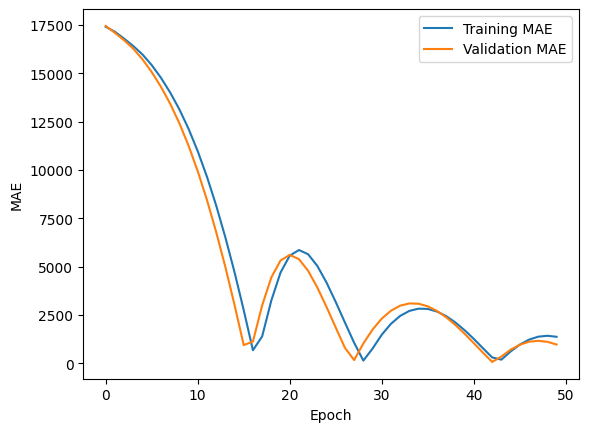

In [80]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(x_test_combined, y_test, batch_size=8)

print(f'Test Mean Absolute Error: {test_mae}')

# Plot training history (optional)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [81]:
# Make predictions on the test set
predictions_Diffusion_Dence = model.predict(x_test_combined)

1/1 [==============================] - 0s 75ms/step


In [82]:
Diffusion_Dense_results = evaluate_preds(y_true=y_test,
                               y_pred= predictions_Diffusion_Dence)
Diffusion_Dense_results

{'mae': 4187.816,
 'mse': 17578928.0,
 'rmse': 4187.816,
 'mape': 23.64327,
 'mase': 25.230755}

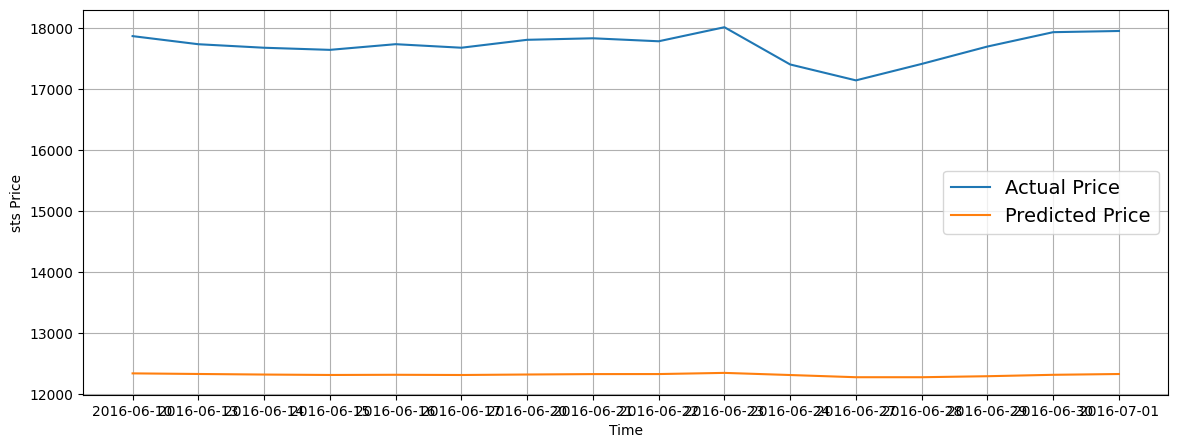

In [69]:
# Plot future price predictions of sts
plt.figure(figsize=(14, 5))
plot_time_series(y_test.index, y_test, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions_Diffusion_Dence, format="-", label="Predicted Price")